In [77]:
from pycalphad.core.hillertmin import lower_convex_hull
import numpy as np

points = np.linspace(1e-12, 0.99, 100)
comptwo = 1 - points
energies = 8.3145 * 2000 * (points*np.log(points) + comptwo*np.log(comptwo))
points = np.array([points, comptwo, energies]).T
num_components = 2
# Add some fictitious points above the hyperplane
max_points = np.zeros((num_components, num_components+1))
max_points[:num_components, :num_components] = np.eye(num_components)
max_points[:, -1] = np.log(np.exp(points[:, num_components].max())+100)
points = np.concatenate((max_points, points), axis=0)
res = np.zeros(2)
lower_convex_hull(points, np.array([0.3, 0.7]), res)

In [78]:
points2 = np.linspace(1e-12, 0.99, 100)
comptwo = 1 - points2
energies = 8.3145 * 1000 * (points2*np.log(points2) + comptwo*np.log(comptwo))
points2 = np.array([points2, comptwo, energies]).T
num_components = 2
# Add some fictitious points above the hyperplane
max_points = np.zeros((num_components, num_components+1))
max_points[:num_components, :num_components] = np.eye(num_components)
max_points[:, -1] = np.log(np.exp(points2[:, num_components].max())+100)
points2 = np.concatenate((max_points, points2), axis=0)

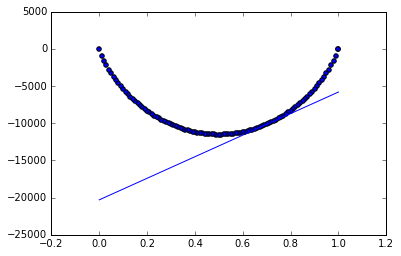

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(points[:, 1], points[:, 2])
plt.plot([0, 1], res)

In [80]:
import numba
nbhyper = numba.guvectorize(['float64[:,:], float64[:], float64[:]'], '(k,l),(m)->(m)')(lower_convex_hull)

In [81]:
%time nbhyper(np.stack([points, points2, points2]), np.array([[0.3, 0.7], [0.7, 0.3], [0.5, 0.5]]))

CPU times: user 5 ms, sys: 1 ms, total: 6 ms
Wall time: 5.93 ms


array([[-20299.81291143,  -5811.59800777],
       [ -3024.5941915 ,  -9872.71768462],
       [ -5846.32277664,  -5680.02168889]])